## **Credit Risk Management**
### **NAME**: EDWARD TAN YUAN CHONG

### **Importing modules required later on**

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

c:\Users\edw4r\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### **Functions used later on**

In [2]:
# Function to plot count plot
def countPlot(data):
    sns.set_style('darkgrid')
    sns.countplot(data,x='Default payment next month')
    plt.title("Count of Number of Customers Defaulting Payment Next Month\n(0: No Default Payment Next Month || 1: Default Payment Next Month)")
    plt.show()

# Function to plot distribution plot
def distributionPlot(data):
    fig, axs = plt.subplots(2,4,figsize=(18,10))
    columns = ['Bill_Amount1','Bill_Amount2','Bill_Amount3','Age','Pay_Amount1','Pay_Amount2','Pay_Amount3','Credit Limit']
    rowCnt,colCnt = 0,0
    for x in columns:
        sns.histplot(data[x],ax=axs[rowCnt][colCnt])
        axs[rowCnt][colCnt].set_xlim([min(data[x].values),max(data[x].values)])
        colCnt += 1
        if(colCnt%4==0):
            colCnt = 0
            rowCnt += 1
        plt.tight_layout()
    fig.suptitle("Distribution of Numeric Variables in Credit Dataset",fontsize=24)
    fig.subplots_adjust(top=0.95)
    plt.show()

# Function to plot confusion matrix heatmap
def confusionMatrix(y_test,y_pred,model_name):
    fig,ax = plt.subplots()
    cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),index=['No Default','Default'],columns=['No Default','Default'])
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',ax=ax).set(title='Confusion Matrix of Prediction of Default Payment Next Month for ' + model_name)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('Actual Labels')
    plt.show()

# Function to plot Precision-Recall curve
def prCurve(pred,type):
    precision, recall, _ = precision_recall_curve(y_test,pred)
    plt.step(recall, precision, color='#004a93', alpha=0.2,
            where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                    color='#48a6ff')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve for ' + type, fontsize=16)
    print('The average precision AUC score for ' + type + ': '+str(auc(recall,precision)))

# **PART A: CLASSIFICATION**

## **INTRODUCTION**

### **How is your prediction task defined? And what is the meaning of the output variable?**

The predication task would be to predict which customers would have default payment in the next month with the aid of a classification model to do so. The output variable would be a binary variable which represents whether a customer will have default payment in the following month or not, taking a value of 1 if a customer has a default payment in the next month, and 0 if they do not.

Defaulting payment happens after multiple payment on a loan or other debts are missed by a person.

The variables included in the dataset aside from the output variable include numeric variables such as Credit Limit, Age, Bill_Amount1, Bill_Amount2, Bill_Amount3,  Pay_Amount1,  Pay_Amount2, Pay_Amount3 and categorical variables such as Gender, Education, and Marriage Status.

In [3]:
# Importing data
credit_data = pd.read_csv("./ST1511 AIML-CA1-datasets/credit_dataset.csv")

# Replace 'univeresity' misspelling to 'university'
credit_data.replace(to_replace='univeresity',value='university',inplace=True)

# Print shape of dataset
print("Shape of dataset: " + str(credit_data.shape))

# Print sample of dataset to see nature
credit_data.sample(5)

Shape of dataset: (1600, 13)


,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
1339,1340,50000,female,high school,married,53,0,0,0,0,0,0,1
853,854,140000,female,university,single,23,44733,44144,44739,2100,2027,1800,0
917,918,120000,male,post-graduate,single,32,0,0,0,0,0,0,1
925,926,180000,male,post-graduate,single,27,11392,14688,14040,3500,0,0,1
247,248,100000,female,university,single,27,37767,34457,30036,1788,1799,1100,0


## **EXPLORATORY DATA ANALYSIS (EDA)**

### **Count of Number of Customers Defaulting Payment Next Month**
We can see from the countplot below that there is a data imbalance in the number of people who default payment next month as majority of customers do not default payment. This data imbalance is very important as it would heavily affect they way the model performs and how we evaluate the model further on.

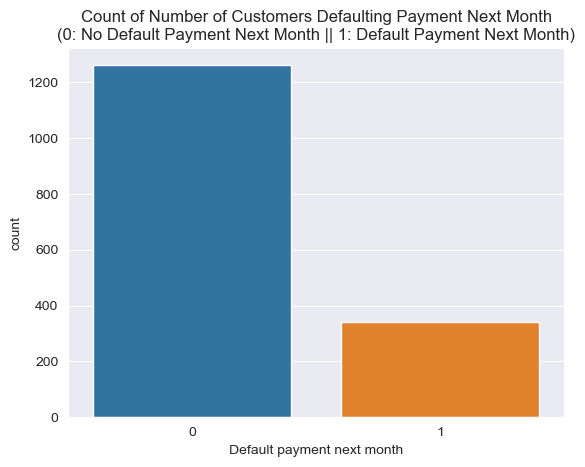

In [4]:
# Plot count plot of number of customers defaulting payment next month
countPlot(credit_data)

### **Distribution of Numeric Variables in Credit Dataset**
From these graphs below, we can see that most numeric variables in the credit dataset are positively-skewed. 

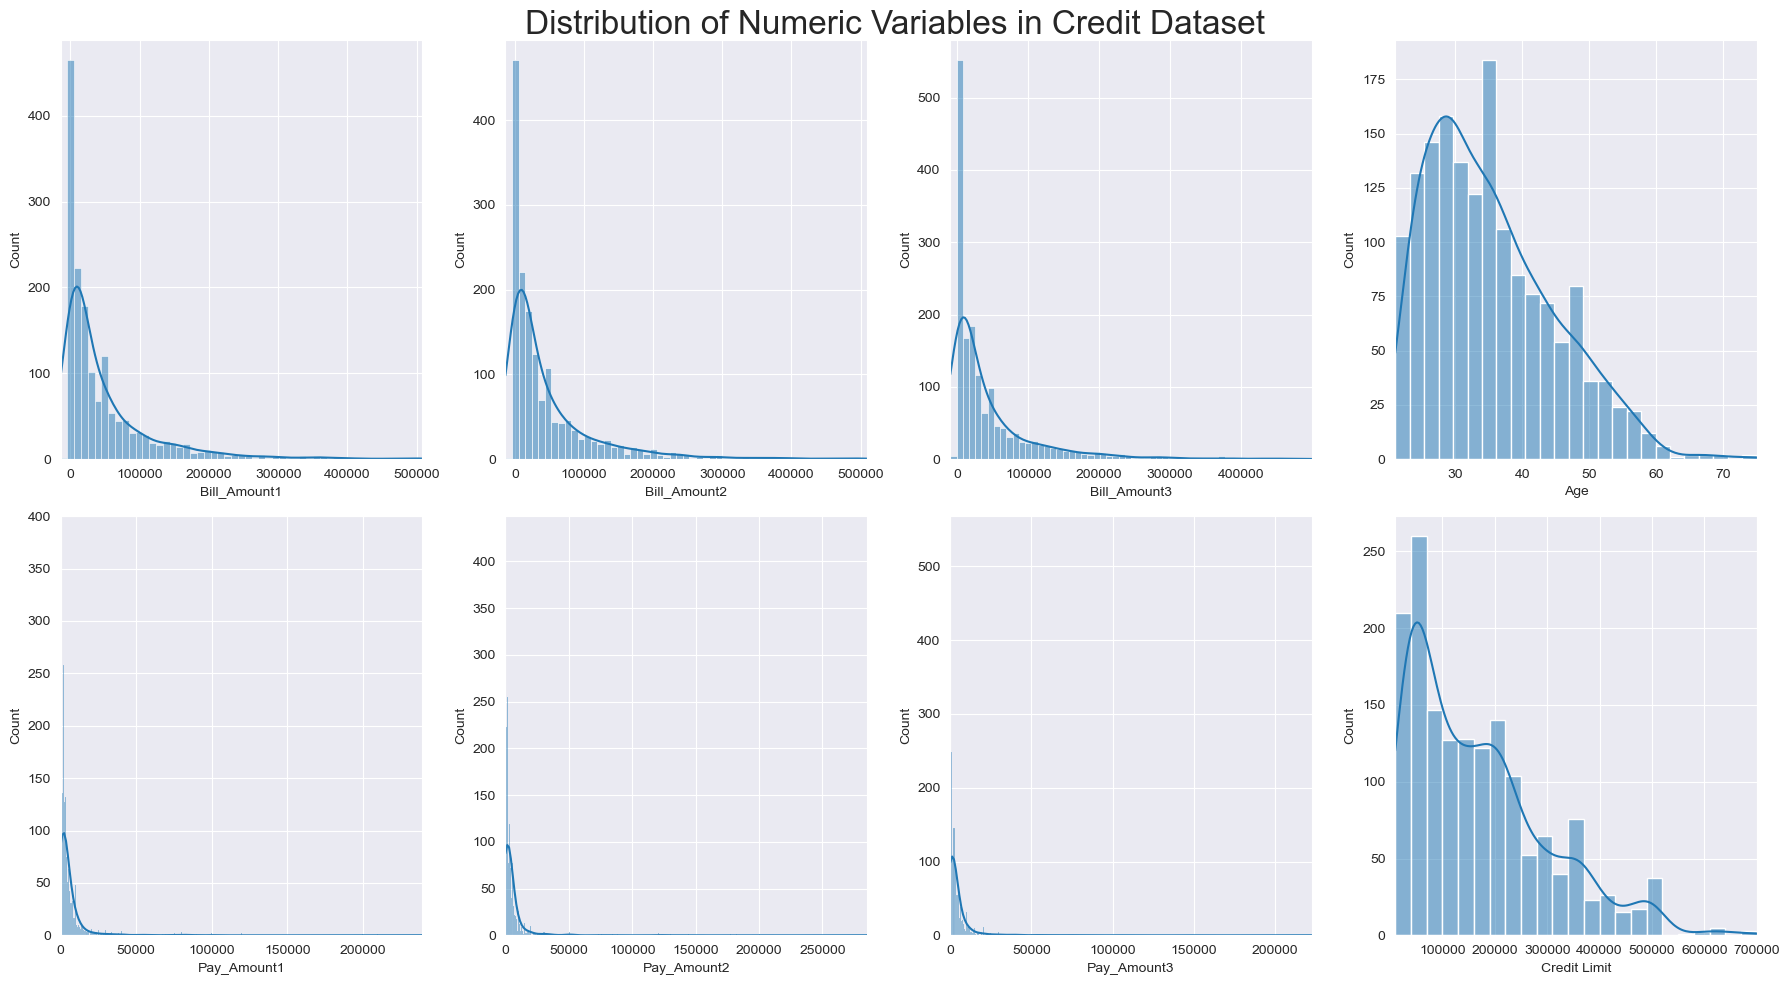

In [5]:
# Data visualization for numeric variables in the dataset
fig, axs = plt.subplots(2,4,figsize=(18,10))
columns = ['Bill_Amount1','Bill_Amount2','Bill_Amount3','Age','Pay_Amount1','Pay_Amount2','Pay_Amount3','Credit Limit']
rowCnt,colCnt = 0,0
for x in columns:
    sns.histplot(credit_data[x],ax=axs[rowCnt][colCnt],kde=True)
    axs[rowCnt][colCnt].set_xlim([min(credit_data[x].values),max(credit_data[x].values)])
    colCnt += 1
    if(colCnt%4==0):
        colCnt = 0
        rowCnt += 1
    plt.tight_layout()
fig.suptitle("Distribution of Numeric Variables in Credit Dataset",fontsize=24)
fig.subplots_adjust(top=0.95)
plt.show()

### **Regression Plot of Age Against Credit Limit**
This regression plot shows that there is a positive linear relationship between age and credit limit where as age increases, credit limit also increases as well, as it is likely because as a customer who uses the credit card for a longer period of time are trusted by the bank in being more responsible and not default payment. Hence, age and credit limit would play a part in the bank's trust in whether one would default payment or not.

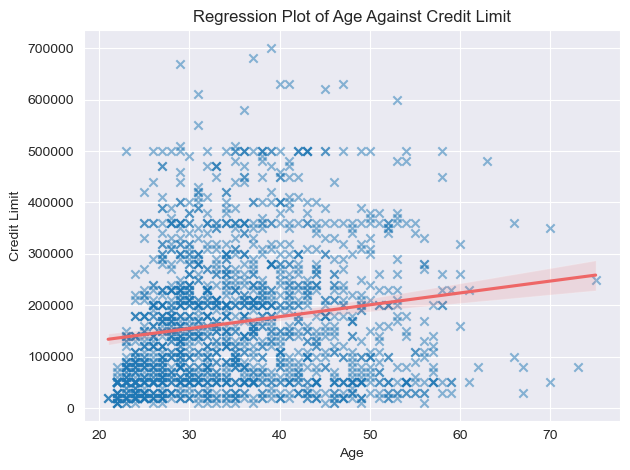

In [6]:
# Plot regression plot of Age against credit limit
sns.regplot(credit_data,x='Age',y='Credit Limit',line_kws={'color':"#ee6666"},marker='x',scatter_kws={'alpha':0.5}).set(title='Regression Plot of Age Against Credit Limit')
plt.tight_layout()
plt.show()

### **Count of Number of People Defaulting Payment by Education**

From this chart, we can see that most people who default payment in the next month tend to come from university students, followed by post-graduates, then high school students. This shows that most people who are unable to meet their loans tend to come from university as most do not have a solid income and are unable to pay off their school fees, hence would default payment whilst post-graduates have income and are more likely to be able to pay off their loans and debts, and high school students tend to not have much loans or debts. This shows that education type would affect whether one defaults payment and would be taken into consideration by the model when predicting.

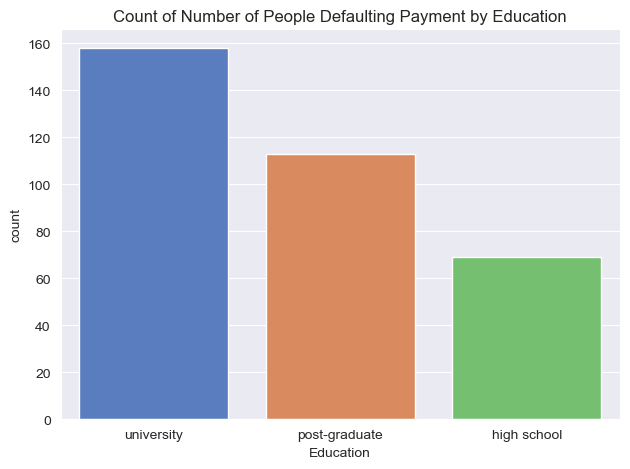

In [7]:
# Plot count plot of Number of People Defaulting Payment by Education
muted = sns.color_palette('muted')
credit_default = credit_data[credit_data['Default payment next month'] == 1]
sns.countplot(credit_default,x='Education',palette=muted).set(title='Count of Number of People Defaulting Payment by Education')
plt.tight_layout()
plt.show()

### **Count of Number of People Defaulting Payment by Age**
This chart shows that most people who default payment tend to be at younger ages, ranging from 22 to 42, which show that young adults tend to be the people who default payment more than people of other ages, likely due to university loans or unemployment after graduation thus unable to repay loans or debts. This shows that age does also play a major factor in whether one defaults payment or not.

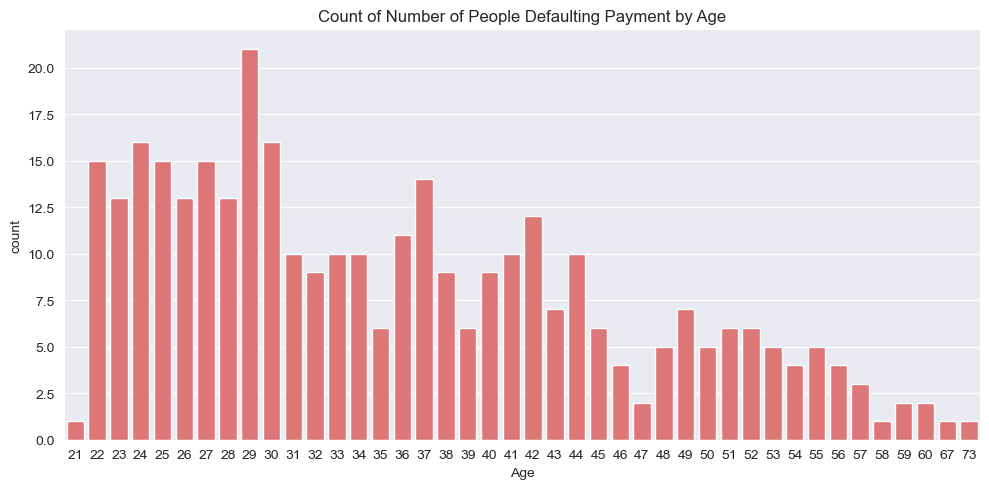

In [8]:
# Plot count plot of Number of People Defaulting Payment by Age
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=credit_default,x='Age',ax=ax,color="#ee6666").set(title='Count of Number of People Defaulting Payment by Age')
plt.tight_layout()
plt.show()

## **FEATURE ENGINEERING**

### **Did you process the features in any way?**
Since the data is heavily imbalanced as shown by the countplot earlier, I used a oversampling method called Random Oversampling from the imbalanced-learn library in python in order to balance the data for the model by increasing the minority cases through repetition of the original examples.

Dropped unnecessary columns

Encoded categorical features into a binary representation so as to allow those columns to be used by the model

Performed scaling of the features in order to help improve the performance of the learning algorithm later on.

Drop unnecessary column "Customer ID" so that it would not be considered as a feature and be used in the prediction as it might decrease the model's performance

In [9]:
# Remove customer ID column
credit_data = credit_data.drop(columns='Customer ID',axis=1)

### **How do you represent your data as features?**
Since the data only has numerical and categorical data, we only have to encode categorical data to binary representation to be used as features.
By using pd.get_dummies() function, it will encode categorical features into dummy variables, with examples in credit data such as gender with 1 being male and 0 not being male, hence females, which allow the data to be represented as features, which are also done for other categorical datas such as Education and Marriage Status. This then allows all the data to be used in the learning algorithm.


In [10]:
# Creating dummy variable
credit_dummy = pd.get_dummies(credit_data,drop_first=True)
credit_dummy.sample(1)

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month,Gender_male,Education_post-graduate,Education_university,Marriage Status_single
704,30000,22,22582,26518,25814,4600,0,0,0,0,0,1,0


In [11]:
# Check for missing values
print("Number of missing values: \n" + str(credit_dummy.isna().sum().sort_values()))

Number of missing values: 
Credit Limit                  0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
Gender_male                   0
Education_post-graduate       0
Education_university          0
Marriage Status_single        0
dtype: int64


In [12]:
# Check for duplicate rows
print("Number of duplicate rows: " + str(credit_dummy.duplicated().sum()))

Number of duplicate rows: 0


In [13]:
# Check datatypes
credit_dummy.dtypes

Credit Limit                  int64
Age                           int64
Bill_Amount1                  int64
Bill_Amount2                  int64
Bill_Amount3                  int64
Pay_Amount1                   int64
Pay_Amount2                   int64
Pay_Amount3                   int64
Default payment next month    int64
Gender_male                   uint8
Education_post-graduate       uint8
Education_university          uint8
Marriage Status_single        uint8
dtype: object

### **Splitting data into test and train set**
I utilized sklearn.model_selection's train_test_split to split my X (features) and y (output) variables into training and test datasets in a stratified fashion, with 80% of the dataset for training and 20% for testing.

In [14]:
# Import modules needed
from sklearn.model_selection import train_test_split
X = credit_dummy.drop(['Default payment next month'],axis=1)
y = credit_dummy['Default payment next month']
# Split data into train and test data, with test size of 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21,stratify=y)

### **Oversample training data**

I utilized the RandomOverSampler from sklearn's oversampling library in order to oversample my train data to randomly duplicate the minority class, which are customers who will default payment next month such that the data for no default payment next month and default payment next month are balanced.

It is important to take note that ONLY the train data is oversampled, not the test data as we want to evaluate the mode's ability to predict based on real world situations, and there would definitely be imbalanced classes in a real world situation, hence we do NOT oversample the test data for evaluation.

In [15]:
# Import modules needed
from imblearn.over_sampling import RandomOverSampler

# Instantiate RandomOverSampler Model
oversampler = RandomOverSampler(sampling_strategy='minority',random_state=42)

# Oversample training data
X_resampled, y_resampled = oversampler.fit_resample(X_train,y_train)

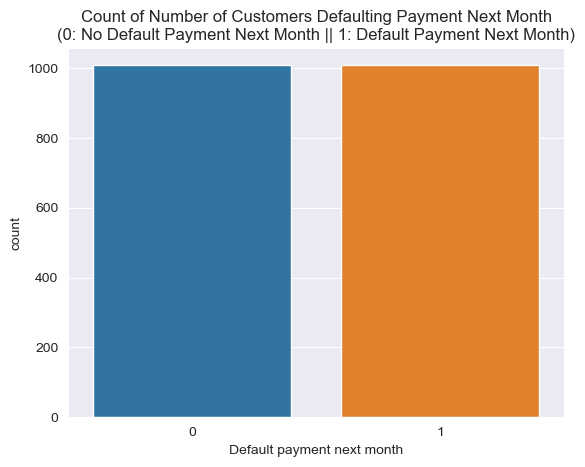

In [16]:
# Plot count plot for sampled data
y_resampled_plot = y_resampled.to_frame()
countPlot(y_resampled_plot)

We can now see that the number of customers default/no default payment next month are equal in our training data, which will allow the model to train based on the balanced data.

In [17]:
# Print out information of dataset
credit_dummy.describe()

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month,Gender_male,Education_post-graduate,Education_university,Marriage Status_single
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,166787.500000,35.224375,49263.408125,47726.644375,44531.051875,5547.646250,5230.494375,4451.610625,0.212500,0.412500,0.377500,0.448750,0.561875
std,129944.635707,9.404550,72687.106917,71476.217397,67164.064239,14085.471957,15569.605419,12491.715387,0.409205,0.492438,0.484913,0.497522,0.496312
min,10000.000000,21.000000,-14386.000000,-13543.000000,-9850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3138.000000,3288.250000,2321.500000,1000.000000,468.500000,226.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,20320.500000,19769.500000,19332.500000,2176.500000,1904.000000,1313.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,230000.000000,41.000000,61602.750000,59891.750000,53857.250000,5021.000000,4592.500000,4000.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,700000.000000,75.000000,507726.000000,509229.000000,499936.000000,239104.000000,285138.000000,222750.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As there are negative and positive values for the Bill Amount features as shown above from .describe(), I used the MaxAbsScaler() to scale the features in X_train and X_test instead of other scaling techniques as MaxAbsScaler() works better with negative and positive values. Furthermore, the models perform better with data scaled with MaxAbsScaler compared to other scaling techniques.

In [18]:
# Scaling with MaxAbsScaler
    
# Import modules needed
from sklearn.preprocessing import MaxAbsScaler

# Instantiate scaler 
scaler = MaxAbsScaler()

# Assign scaled values to variables
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

### **How did you select which learning algorithms to use?**
In order to select which learning algorithms to use, I used cross_val_score from sklearn.model_selection library to evaluate the classification models such as Logistic Regression, K-Nearest Neighbour (KNN), Random Forest, Decision Tree, Naive Bayes, SVM, and Gradient Boosting, and evaluated their scores and ROC curve in order to decide which model would be best to provide the most accurate predictions for the scenario based on theirs scores from cross validation.

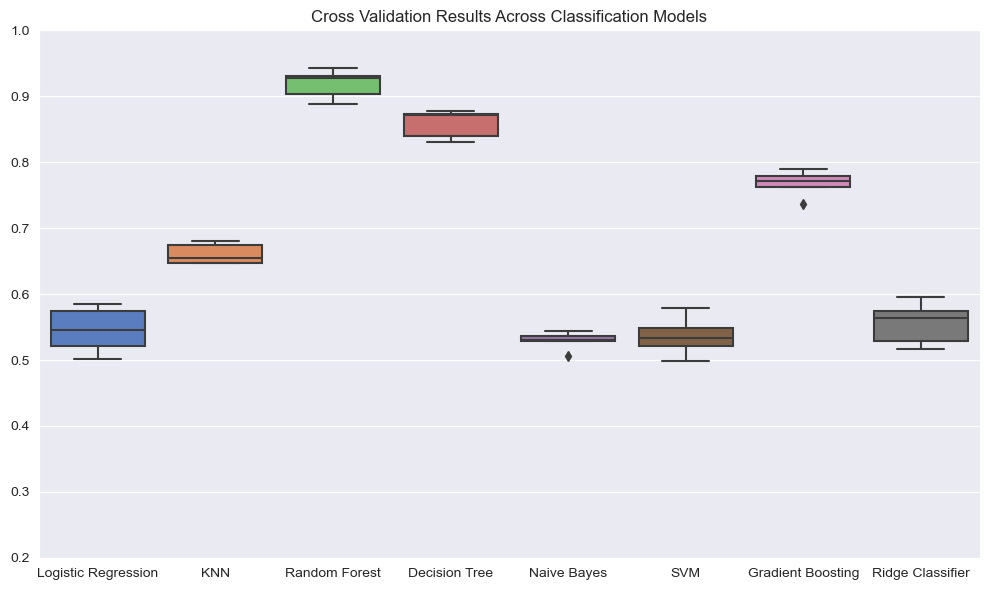

Logistic Regression Recall Cross Validation Score: 0.546
KNN Recall Cross Validation Score: 0.655
Random Forest Recall Cross Validation Score: 0.928
Decision Tree Recall Cross Validation Score: 0.871
Naive Bayes Recall Cross Validation Score: 0.531
SVM Recall Cross Validation Score: 0.533
Gradient Boosting Recall Cross Validation Score: 0.772
Ridge Classifier Recall Cross Validation Score: 0.563


In [19]:
# Import modules needed
from sklearn import svm
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,RidgeClassifier


# Learning algorithms to be evaluated
models = {"Logistic Regression":LogisticRegression(solver='lbfgs', max_iter=1000), "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),"Decision Tree": DecisionTreeClassifier(),
        "Naive Bayes": GaussianNB(),"SVM": svm.SVC(),"Gradient Boosting": GradientBoostingClassifier(),
        "Ridge Classifier": RidgeClassifier()}

# Variable to store all cross validation results for later on
model_results = []

# Getting cross validation results for each learning algorithm for classification
for model in models.values():
    kf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
    cv_result = cross_val_score(model, X_train_scaled,y_resampled, cv=kf,scoring='accuracy')
    model_results.append(cv_result)

# Plotting boxplot to visualize cross validation results for each model
sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(model_results,ax =ax,palette=muted)
ax.set(title="Cross Validation Results Across Classification Models")
ax.set_xticklabels(models.keys())
ax.set_ylim(0.2,1.0)
plt.tight_layout()
plt.show()

# Print score values
for x in range(len(models)):
    keys = list(models.keys())
    print(str(keys[x]) +" Recall Cross Validation Score: " + str(round(statistics.median(model_results[x]),3)))


### **ROC Curve**

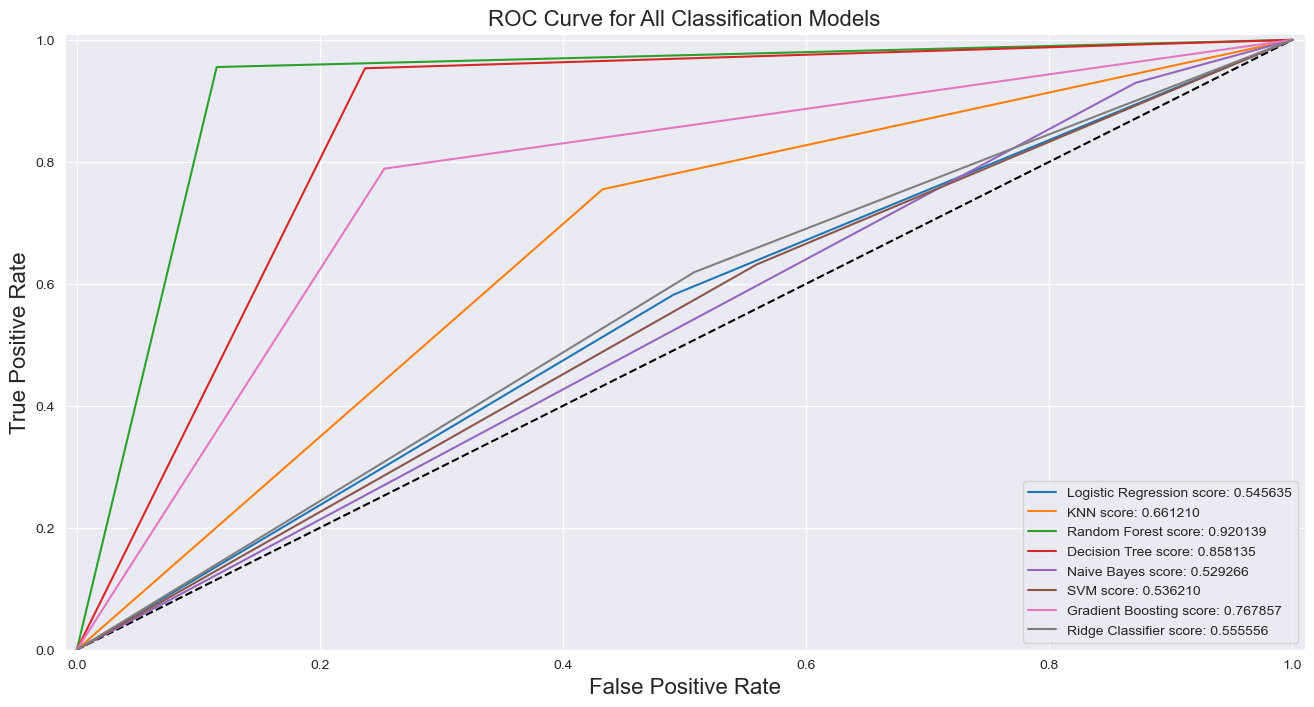

In [20]:
# Import modules
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_predict

# Obtain cross value prediction scores of all models
pred_list = []
for x in range(len(models)):
    pred_list.append(cross_val_predict(models[list(models.keys())[x]],X_train_scaled,y_resampled,cv=kf))

# Plot ROC curves
ax = plt.subplots(figsize=(16,8))
plt.title('ROC Curve for All Classification Models',fontsize=16)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01,1.01,0,1.01])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# Loop and plot each ROC curve for each model
for a in range(len(pred_list)):
    roc_fpr, roc_tpr, roc_threshold = roc_curve(y_resampled,pred_list[a])
    plt.plot(roc_fpr,roc_tpr,label=(list(models.keys())[a] + " score: {:.6f}".format(roc_auc_score(y_resampled,pred_list[a]))))
plt.legend()
plt.show()

The boxplot shows that across all the classification models used, Random Forest Classifier has the highest cross validation score at around 0.93, while Naive Bayes has the lowest cross validation score at around 0.55.

The ROC curve also shows that across all the classification models used, Random Forest Classifier also performed the best by being able to achieve the highest true positive rate along with the lowest False positive rate, and the highest cross validation prediction score of around 0.90

Hence, for our scenario, the best learning algorithm to use would be Random Forest Classifier.

### **SMOTE SAMPLING [NOT IMPLEMENTED]**

Initially, I wanted to implement SMOTE sampling for my dataset, however, I found out that it does not work as well as it decreased my f1/recall/precision scores overall during my final test on test data with my model, hence I did not implement it in my preprocessing of features.

After scaling, we perform our SMOTE technique for oversampling to remove data imbalance as it would lead to overfitting, and since SMOTE would lead to "data leakage" when performed before cross validating as the validation set would be directly influenced by SMOTE, we have to perform SMOTE during every fold of cross validation in order to prevent overfitting and getting scores that are inaccurate during cross validation. 

In [21]:
# # Perform SMOTE with cross validation performed within each fold [NOT IMPLEMENTED]
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import StratifiedKFold
# from imblearn.pipeline import make_pipeline as imbalance_make_pipeline
# from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score

# # Checking train and test set length before performing oversampling
# print(f'Length of X (train): {len(X_train_scaled)} | Length of y (train): {len(y_train)}')
# print(f'Length of X (test): {len(X_test_scaled)} | Length of y (test): {len(y_test)}')

# # Variables for results
# precision_list = []
# recall_list = []
# f1_list = []
# auc_list = []

# # Instantiate Model, Pipeline and stratified KFold
# model = RandomForestClassifier()
# pipeline = imbalance_make_pipeline(SMOTE(sampling_strategy='minority'),model)
# sf = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

# # Perform pipeline of SMOTE and Random Forest per fold (5 total folds)
# for train,test in sf.split(X_train_scaled,y_resampled):
#     model = pipeline.fit(X_train_scaled[train],y_resampled[train])
#     pred = model.predict(X_train_scaled[test])
#     precision_list.append(precision_score(y_resampled[test],pred))
#     recall_list.append(recall_score(y_resampled[test],pred))
#     f1_list.append(f1_score(y_resampled[test],pred))
#     auc_list.append(roc_auc_score(y_resampled[test],pred))

# # Print results
# print("\nPrecision score:",np.mean(precision_list))
# print("Recall Score: ",np.mean(recall_list))
# print("F1 Score: ",np.mean(f1_list))
# print('AUC: ',np.mean(auc_list))

In [22]:
# # Performing SMOTE on training data to be fitted with model later on [NOT IMPLEMENTED]
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(sampling_strategy='minority',random_state=42) 
# X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

In [23]:
# # Scaling with MaxAbsScaler again after using SMOTE [NOT IMPLEMENTED]
    
# # Import modules needed
# from sklearn.preprocessing import MaxAbsScaler

# # Instantiate scaler 
# scaler = MaxAbsScaler()

# # Assign scaled values to variables
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

### **Did you try to tune the hyperparameters of the learning algorithm, and in that case how?**
For hyperparameter tuning, I utilised sci-kit learn's GridSearchCV in order to find the best parameters among a few hyperparameters for my Random Forest Classifier model to obtain the best cross validation score, adjusting hyperparameters such as:

    - n_estimators: Number of trees in the forest
    - max_depth: Maximum depth of the trees
    - min_samples_split: Minimum number of samples required to split one node
    - min_samples_leaf: Minimum number of samples required at every leaf node

In [24]:
# Import modules
from sklearn.model_selection import GridSearchCV

# Hyperparameters to test on RandomForestClassifier model
param_grid = {
    'n_estimators': range(1,21), 
    'max_depth': [None,5, 10, 15, 20], 
    'min_samples_leaf': [1, 2, 4,10], 
    'min_samples_split': [2, 5, 10,20]
}

# Instantiate the model
rf = RandomForestClassifier(random_state=42)
kf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

# Instantiate Grid Search Cross Validation
gridsearch = GridSearchCV(estimator=rf,param_grid=param_grid,cv=kf,n_jobs=-1,scoring='accuracy')

# Fit the model
gridsearch.fit(X_train_scaled,y_resampled)

# Print cross validation results from hyperparameters
print("Best hyperparameters: " +str(gridsearch.best_params_) + "\nBest training score from hyperparameters: " + str(gridsearch.best_score_))

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 16}
Best training score from hyperparameters: 0.9206336142299094


### **Computing class weight**


I utilized sklearn's compute_class_weight to calculate the class weight to set for my model before fitting in order to balance the class weights to allow the model to perform better with the imbalanced test data.

In [25]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_labels = np.unique(y_train) 
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train)

# Store class_weight into a dictionary
class_weights_dict = {class_labels[i]: class_weights[i] for i in range(len(class_labels))}

print("Computed class weight distribution: " + str(class_weights_dict))

Computed class weight distribution: {0: 0.6349206349206349, 1: 2.3529411764705883}


I also performed gridsearch cross validation to find the best class weight parameter to obtain the best scores

In [26]:
# Parameter grid of different class_weights to test
param_grid = {'class_weight': [class_weights_dict,{0:100,1:1},{0:10,1:1},{0:1,1:1},{0:1,1:10},{0:1,1:100}]}

# Instantiate model with best parameters
rf = RandomForestClassifier(**gridsearch.best_params_,random_state=42)

# Instantiate GridSearchCV with model and param grid
param_gridsearch = GridSearchCV(estimator=rf,param_grid=param_grid,cv=kf,scoring='accuracy')

# Fit the model
param_gridsearch.fit(X_train_scaled,y_resampled)

# Print cross validation results from hyperparameters
print("Best class_weight: " +str(param_gridsearch.best_params_) + "\nBest training score from class_weights: " + str(gridsearch.best_score_))

Best class_weight: {'class_weight': {0: 1, 1: 10}}
Best training score from class_weights: 0.9206336142299094


In [27]:
# Fit model with best hyperparameters and best class weight
# Instantiate the model
model = RandomForestClassifier(**gridsearch.best_params_,
                               class_weight=param_gridsearch.best_params_['class_weight'],
                               random_state=42)

# Fit the model
model.fit(X_train_scaled,y_resampled)

RandomForestClassifier(class_weight={0: 1, 1: 10}, n_estimators=16,
                       random_state=42)

## **MODEL EVALUATION**

### **How do you evaluate the quality of your system?**


I evaluated the quality of my system with a classification report and a confusion matrix from the sklearn.metrics library. This allows me to see the precision,recall,f1 and accuracy of my model, and the confusion matrix of the model's predictions.

I also utilized the Precision-Recall Curve (PR curve) from sklearn.metrics library as well to plot the PR curve to view the model's performance in terms of precision and recall score, along with AUC for the PR Curve.

Initially, I used the ROC curve instead of the PR curve, however, after finding out that there is a heavy data imbalance, I decided to not implement the ROC curve as it might not be an accurate interpretation of the model's performance.

Since there is a heavily imbalanced test data, our focus should be on the recall score of the minority class, hence recall score of customers actually defaulting next month [1], rather than the overall accuracy of the model to determine the model's quality.

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       252
           1       0.39      0.16      0.23        68

    accuracy                           0.77       320
   macro avg       0.60      0.55      0.55       320
weighted avg       0.72      0.77      0.73       320



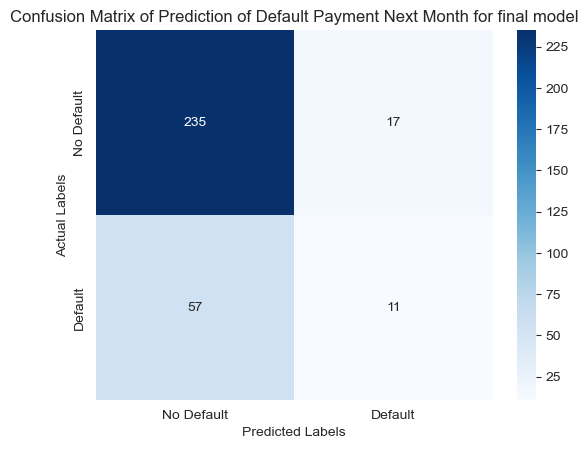

In [28]:
# Import modules
from sklearn import metrics

# Prediction with scaled x test values
y_pred = model.predict(X_test_scaled)

# Print classification report
print(metrics.classification_report(y_test,y_pred))

# Plot heatmap of confusion matrix
confusionMatrix(y_test,y_pred,'final model')

TOP-LEFT SQUARE => True Negative

TOP-RIGHT SQUARE => False Positive

BOTTOM-LEFT SQUARE => False Negative

BOTTOM-RIGHT SQUARE => True Positive


### **Precision Recall Curve (PR Curve)**

The average precision AUC score for final model: 0.3663734243697479


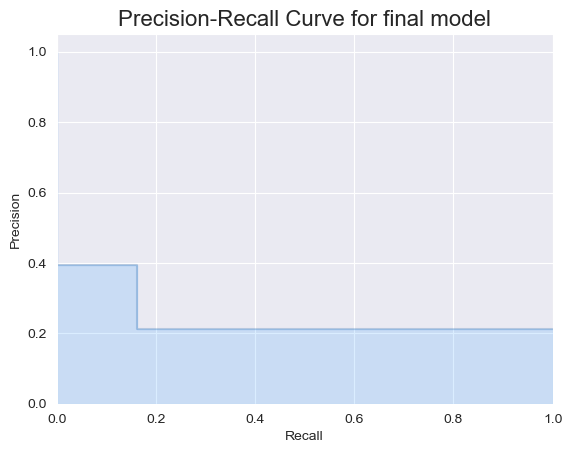

In [29]:
# Import modules needed
from sklearn.metrics import precision_recall_curve,auc

# Plot precision recall curve for final model
prCurve(y_pred,'final model')

### **Can you say anything about the errors that the system makes?**
[IF HYPERPARAMETER IS MAX_DEPTH!=20 AND CLASS_WEIGHT != {0:1,1:100}] 

From the above confusion matrix, we can see that the model most true negatives, no default payment next month, correctly with a few errors, whilst majority of true positives were predicted wrongly, as most of actual default payment next month are predicted as no default payment next month, showing that the model predicts the majority correctly and minority poorly, which is a consequence of imbalanced test data. 

As there is imbalanced test data, the model may be biased towards predicting the majority label, no default payment next month more frequently, and hence being unable to predict the minority class, default payment next month well, leading to a higher number of false negatives and lower true positives. 

Generally, the model made a lot of mistakes in predicting customers who actually default payment to default payment, which could be detrimental to the bank for risk management as there would be more customer who actually default payment than expected if this system was used in the real world.

Overall, the PR curve shows a relatively higher precision score of 0.4 for the initial recall score from 0.0 to 0.2, but drops to a lower precision score of 0.2 for recall scores from 0.2 onwards. This shows that initially as the model predicts a small number of positive instances, it was relatively accurate in predicting the true positives, however, as the number of positive instances predicted increases, the model becomes less accurate in predicting and starts to make more errors in its prediction of true positives, and leads to more false positives instead.

The average precision area under curve score is also relatively low at around 0.39 due to data imbalance making the model predict poorly.

However, we clearly do not want the bank to be unable to predict the number of people actually defaulting and be underprepared for the number of people actually defaulting payment as this would lead to the bank being unable to manage its risks during loaning, which could potentially have detrimental effects on the bank, such as affecting its financial stability as they may be unable to prepare for potential losses from loans, hence we should find a solution to improve the system's ability to increase its number of true positives predicted.

### **ROC CURVE [NOT IMPLEMENTED]**
Initially I utilized ROC curve in order to evaluate the model's performance, however, since our focus is now on recall score due to the data imbalance in the test data, ROC curve would be misleading as ROC curve's evaluation result of the model does not take into account imbalanced data, hence, after consideration, I chose not to implement the ROC curve during model evaluation.

Precision Recall Curve, PR curve, is used instead of the ROC curve as mainly, there is a huge data imbalance in our dataset as there are lesser 'positive' cases compared to 'negative' cases, and PR curves focuses on the minority class and are tailored to detecting rare events, in this case would be default payment next month. Hence, PR curve would be favoured over ROC curve.

In [30]:
# # Plot ROC curve [NOT IMPLEMENTED]

# # Calculate False Positive Rate (fpr), True Positive Rate (tpr) and threshold value for plotting ROC curve
# fpr, tpr, thresholds = roc_curve(y_test,y_pred)

# # Calculate Area Under ROC Curve score (AUC)
# auc_score = roc_auc_score(y_test,y_pred)

# # Plotting of ROC Curve
# plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Random Forest Classifier')
# plt.legend(loc='lower right')
# plt.show()

### **SOLUTION TO IMPROVE TRUE POSITIVE RATES**
### **MODEL EVALUATION WITH SPECIFIC MAX_DEPTH AND CLASS_WEIGHTS**
***Look at this section if the previous model's parameters are not max_depth = 20 and class_weight = {0:1,1:100}***

In [31]:
# Fit model with specific parameters
# Instantiate the model
model = RandomForestClassifier(max_depth=20,
                               n_estimators=gridsearch.best_params_['n_estimators'],
                               min_samples_leaf=gridsearch.best_params_['min_samples_leaf'],
                               min_samples_split=gridsearch.best_params_['min_samples_split'],
                               class_weight={0:1,1:100},
                               random_state=42)

# Fit the model
model.fit(X_train_scaled,y_resampled)

RandomForestClassifier(class_weight={0: 1, 1: 100}, max_depth=20,
                       n_estimators=16, random_state=42)

              precision    recall  f1-score   support

           0       0.83      0.34      0.48       252
           1       0.23      0.75      0.36        68

    accuracy                           0.42       320
   macro avg       0.53      0.54      0.42       320
weighted avg       0.71      0.42      0.45       320



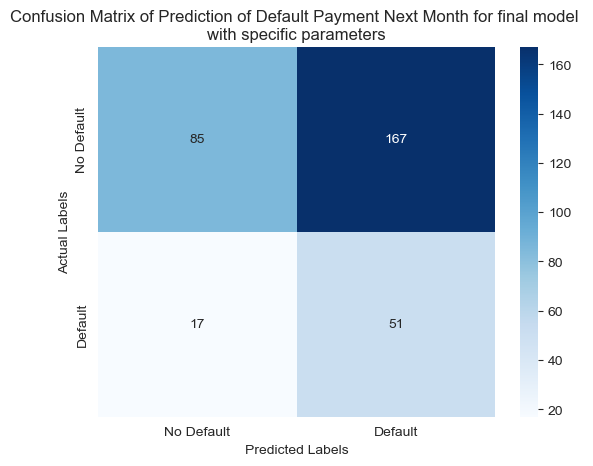

In [32]:
# Prediction with scaled x test values
y_pred_specific = model.predict(X_test_scaled)

# Print classification report
print(metrics.classification_report(y_test,y_pred_specific))

# Plot heatmap of confusion matrix
confusionMatrix(y_test,y_pred_specific,'final model \nwith specific parameters')

The average precision AUC score for final model with specific parameters: 0.5185349770642202


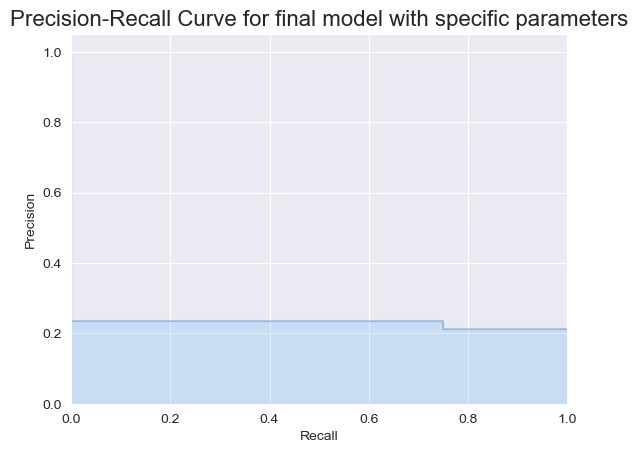

In [33]:
# Plot precision recall curve for model with specific parameters
prCurve(y_pred_specific,'final model with specific parameters')

From these specific parameters, max_depth = 20, and class_weight = {0:1,1:100}, we can see that the model performs way better in terms of recall score and predicting true positives, which is more crucial for the bank in terms of risk management. By adjusting the class weight to give the minority class (actual default payment next month [1]) significantly more importance, it would help the model focus more on correctly identifying instances of the minority class, at the cost of the model's performance predicting the majority class, however, in a imbalanced dataset, improving predictions of the minority class would be our main focus. By setting max_depth = 20, compared to other values such as None, it prevents overfitting as it limits the depth of the number of trees in the random forest classifier, which restricts the complexity of trees, allowing our model to focus on predicting more true positives, especially since our model is heavily imbalanced and is very prone to overfitting.

There are also other combinations of max_depth and class_weights that can be tested to provide varying results from the model based on the bank's needs. 

**ALTERATIONS THAT CAN BE DONE**

Max_depth can be lowered to increase the recall score of the minority class at the cost of the recall score of the majority class, vice versa. Example max_depth = 17 would increase the recall score of the minority class, and max_depth = 27 would decrease the score of the minority class but increase the score of the majority class

Class_weight ratio between 0 and 1 can be adjusted to favour the minority class less in order to increase scores for majority class. Example class_weight = {0:1,1:10} would decrease the importance of the minority class to the model, decreasing the recall score for the minority class

An example below that provides a more balanced confusion matrix would be by setting max_depth = 25 and class_weight={0:1,1:60}, which can also be considered by the bank.

              precision    recall  f1-score   support

           0       0.84      0.63      0.72       252
           1       0.29      0.56      0.38        68

    accuracy                           0.62       320
   macro avg       0.57      0.59      0.55       320
weighted avg       0.72      0.62      0.65       320



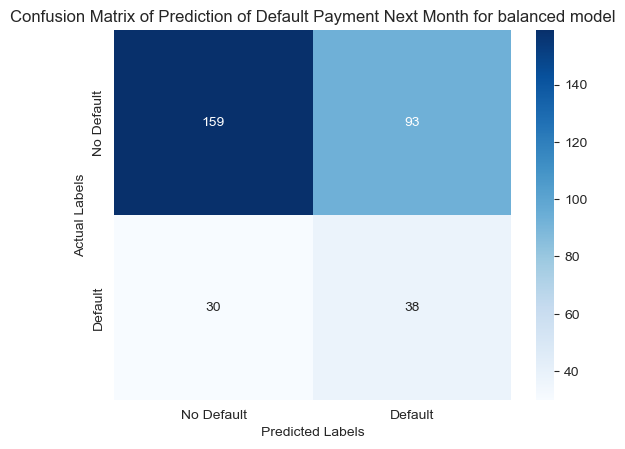

In [34]:
# Instantiate model
alter_model = RandomForestClassifier(
                                max_depth=25,
                                n_estimators=gridsearch.best_params_['n_estimators'],
                                min_samples_leaf=gridsearch.best_params_['min_samples_leaf'],
                                min_samples_split=gridsearch.best_params_['min_samples_split'],
                                class_weight={0:1,1:60},
                                random_state=42)
# Fit the model
alter_model.fit(X_train_scaled,y_resampled)

# Prediction with scaled x test values
y_pred_alter = alter_model.predict(X_test_scaled)

# Print classification report
print(metrics.classification_report(y_test,y_pred_alter))

# Print confusion matrix
confusionMatrix(y_test,y_pred_alter,"balanced model")

We can see that altering the model's hyperparameters such as max_depth or class_weights could change the model's prediction results, and can be altered to give a more balanced prediction as shown above. Hence, the decision of which model and parameters to pick would ultimately be up to the bank's preference in terms of their risk tolerance, business objectives, values etc.

Personally, I believe in the bank favouring the model that can predict as many true positive as possible to reduce risks of financial instability. Hence I would be following the model with a max_depth of 20 and class_weight of {0:1,1:00}.

### **How well does your system compare to a dummy baseline?**

For the dummy baseline classifier, I utilized the 'stratified' strategy as I want to take into account that the fact that there is a data imbalance in the class distribution of my data, and a dummy classifier with a 'stratified' strategy would help to predict the class labels in a way that would reflect the class distribution, which was the reason I chose 'stratified' over other strategies such as 'most_frequent', 'prior' or 'uniform' etc.

              precision    recall  f1-score   support

           0       0.74      0.44      0.56       252
           1       0.17      0.43      0.24        68

    accuracy                           0.44       320
   macro avg       0.46      0.44      0.40       320
weighted avg       0.62      0.44      0.49       320



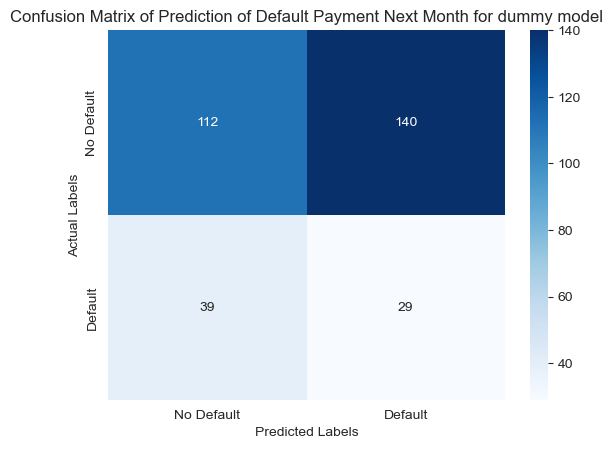

In [35]:
# Import modules needed
from sklearn.dummy import DummyClassifier

# Instantiate dummy model
dummy_model = DummyClassifier(strategy='stratified')

# Fit dummy model to training data
dummy_model.fit(X_train_scaled,y_resampled)

# Predict with dummy model
y_pred_dummy = dummy_model.predict(X_test_scaled)

# Print result
print(metrics.classification_report(y_test,y_pred_dummy))
confusionMatrix(y_test,y_pred_dummy,'dummy model')


From the dummy classifier, we can see that it predicts around half of actual default and no default correctly while the other half is predicted wrongly from the 'stratefied' strategy. Comparing my system to the dummy classifier, since the bank should focus more on the recall score and the model's ability to predict actual defaults correctly (true positive), my system does better in having higher true positives compared to the dummy model, however, the dummy model is able to predict more true negatives correctly. Despite that, in the context of risk management, I believe that it is more important for the bank to focus on the true positives and predicting for actual defaults more accurately and hence my system would be better for the bank despite the system still making errors.

However, if the bank is looking for a more balanced approach, my system's balanced confusion matrix still performs better in comparison to the dummy model, and hence my system performs better than the dummy model overall.

The average precision AUC score for dummy model: 0.3599716106856944


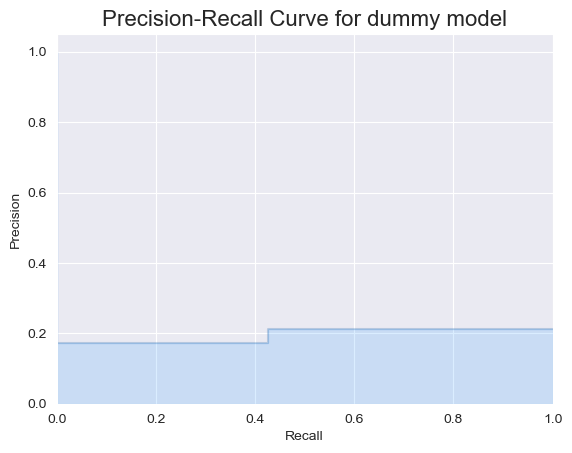

In [36]:
# Plot precision recall curve for dummy model
prCurve(y_pred_dummy,'dummy model')

The PR curve also is seen to have a lower AUC score for the dummy model in comparison to my system, and hence my system would be better compared to the dummy model in terms of precision recall score.

### **Is it possible to say something about which features the model considers important?**

From the feature importance score barplot below, we can see that features such as Pay_Amount1 is the most important features for the model in predicting, as well as Bill_Amount1, Bill_Amount2 and Pay_Amount2, shown by the higher feature importance scores among the features, indicating that these features have a greater influence on the model's prediction. Hence, Pay_Amount1, Bill_Amount1, Bill_Amount2 and Pay_Amount2 are considered important by the model. Meanwhile, Gender_male, Education_post-graduate, Education_university and Marriage Status_single are features of significantly less importance.

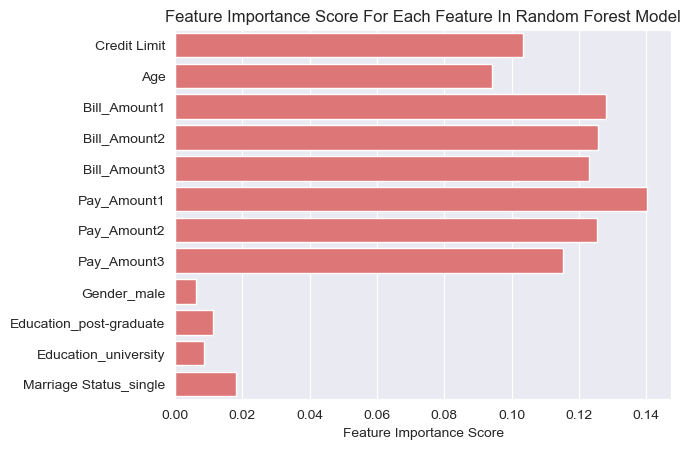

In [37]:
# Get column names excluding output variable (default payment next month)
columns = list(credit_dummy.columns)
columns.remove('Default payment next month')

# Plot barplot of feature importance scores
sns.barplot(y=columns,x=model.feature_importances_,color='#ee6666').set(title='Feature Importance Score For Each Feature In Random Forest Model',xlabel='Feature Importance Score')
plt.show()


### **Redo model with only important features**

I redid the model with only important features this time in order to check if the model would perform better without features that are less important, removing features such as Gender_male, Education_post-graduate,Education_university and Marriage Status_single.

In [38]:
# Dropping columns with low feature importance
credit_impt = credit_dummy.drop(['Gender_male','Education_post-graduate','Education_university','Marriage Status_single'],axis=1)
credit_impt.head(5)

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,20000,24,3913,3102,689,0,689,0,1
1,120000,26,2682,1725,2682,0,1000,1000,1
2,90000,34,29239,14027,13559,1518,1500,1000,0
3,50000,37,46990,48233,49291,2000,2019,1200,0
4,50000,57,8617,5670,35835,2000,36681,10000,0


              precision    recall  f1-score   support

           0       0.86      0.24      0.38       252
           1       0.23      0.85      0.37        68

    accuracy                           0.37       320
   macro avg       0.55      0.55      0.37       320
weighted avg       0.73      0.37      0.38       320



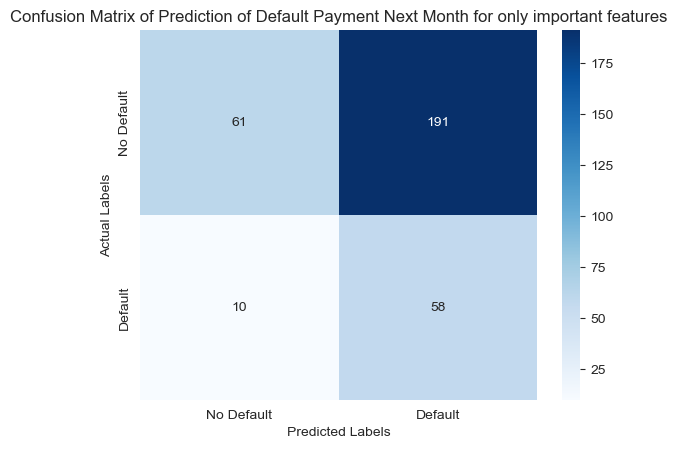

In [39]:
# REDO ENTIRE MODEL WITH ONLY IMPORTANT FEATURES
X_impt = credit_impt.drop(['Default payment next month'],axis=1)
y_impt = credit_impt['Default payment next month']

# Train test split
X_train_impt, X_test_impt, y_train_impt, y_test_impt = train_test_split(X_impt,y_impt,random_state=21,test_size=0.2,stratify=y)

# Scale data
scaler = MaxAbsScaler()
X_train_scaled_impt = scaler.fit_transform(X_train_impt)
X_test_scaled_impt = scaler.transform(X_test_impt)

# Sample data 
sampler = RandomOverSampler(random_state=42)
X_train_sampled_impt,y_train_sampled_impt = sampler.fit_resample(X_train_scaled_impt,y_train_impt)

# Fit and predict with model (that has best minority class recall score)
model = RandomForestClassifier(n_estimators=gridsearch.best_params_['n_estimators'],
                               min_samples_leaf=gridsearch.best_params_['min_samples_leaf'],
                               min_samples_split=gridsearch.best_params_['min_samples_split'],
                               max_depth=20,
                               class_weight={0:1,1:100},
                               random_state=42)
model.fit(X_train_sampled_impt,y_train_sampled_impt)
y_pred_impt = model.predict(X_test_scaled_impt)

# Evaluate model
print(metrics.classification_report(y_test_impt,y_pred_impt))
confusionMatrix(y_test_impt,y_pred_impt,'only important features')

The average precision AUC score for only important features: 0.5585614516891094


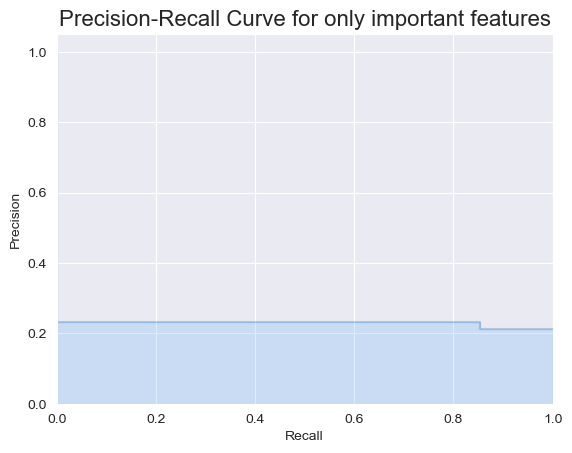

In [40]:
# Plot Precision Recall curve for model with only important features
prCurve(y_pred_impt,'only important features')

By removing features that are less important to predict the classes, we can see a slight increase in the number of true positives, but also an even bigger increase in false positives predicted as well. This shows that by removing less important features, it does help improve the overall precision-recall score, however, it also negatively affects the number of false positives as well. The decision of whether to remove important features would then be up to the bank on whether they are willing to sacrifice a higher number of false positives for an increase in true positives, which would fall under the bank's ideals and goals in the end.

## **CONCLUSION**

In conclusion, since the bank should prioritise predicting the minority class as in terms of risk management, it is better to be safe than sorry by being able to overprepare themselves for a higher number of defaults in the following month rather than being able to only predict well for the majority class as they would want to prevent adverse effects such as financial instability when they are unprepared for the potentially higher number of defaults than anticipated. Thus, from my final model with specific hyperparameters, the bank would be able to predict most actual defaults accurately while having to sacrifice the model's performance in predicting no actual defaults accurately. Furthermore, the bank could improve the model's performance in predicting the minority class in favour of the model's performance in prediciting the majority class even further by removing important features. 

However, if the bank prioritises having a balance in predicting the minority and majority class, the hyperparameters of the model can also be adjusted, as shown by the balanced model, to fit their needs.

Ultimately, the decision on the trade-off between the majority and minority class would depend on the bank's risk tolerance, values, and business objectives.